# 1. Как вы кратко охарактеризуете датасет, про что он?

Подключу библиотеки, которые пригодятся мне в ходе выполнения домашней работы. 

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels import robust
import seaborn as sns

Предварительно скачаю csv файл с необходимыми данными и помещу его в объект dataset с помощью встроенных методов библиотеки pandas

In [14]:
data_name = "C:\\Users\\arxie\\Desktop\\Google-Playstore.csv"
dataset = pd.read_csv(data_name)
dataset

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,...,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,...,http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,...,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,...,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


Вытащю информацию о содержимом датафрейма с помощью метода info

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

__Ответ: Данный датасет содержит информацию о приложениях из Google Play Store за июнь 2021 года. В него включены по 24 характеристики для каждого приложения с информацией разного типа. Датасет содержит свыше двух миллионов уникальных значений.__


# 2.Сколько в среднем скачиваний у приложение в выборке?

Проверю наличие пустых значений

In [41]:
dataset.isna().sum()

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

### Пустые значения присутствуют.
Выделю критические важные столбцы -- App name, Category, Rating, Rating Count, Minimum Intalls, Maximum Installs, Price. В столбцах, где в качестве значений используются объекты, удалю строки с не заданным значением. В столбцах, где используются в качестве значений числа -- занулю соответствующие данные.

In [45]:
critical_columns_categorial = ["App Name", "Category" ]
critical_colums_numeric = ["Rating", "Rating Count", "Minimum Installs", "Maximum Installs", "Price"]
dataset[critical_colums_numeric] = dataset[critical_colums_numeric].fillna(0)
dataset = dataset.dropna(subset=critical_columns_categorial)
dataset.isna().sum()

App Name                  0
App Id                    0
Category                  0
Rating                    0
Rating Count              0
Installs                107
Minimum Installs          0
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760834
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420952
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

Пустые ячейки удалены.

Теперь можно начать обрабатывать сам датафрейм, так как ситуация с неопределенным поведением из-за неизвестного наполнения ячейки и смазанным результатом из-за неккоретной выборки предотвращена. 

In [49]:
print(int(dataset["Minimum Installs"].mean())," -- среднее минимальное количество скачиваний")
print(int(dataset["Maximum Installs"].mean()), " -- среднее максимальное количество скачиваний")
print(int((dataset["Minimum Installs"].mean() + dataset["Maximum Installs"].mean()) / 2), " -- среднее количество скачиваний")

183436  -- среднее минимальное количество скачиваний
320201  -- среднее максимальное количество скачиваний
251819  -- среднее количество скачиваний


**Ответ : в среднем у данной выборки приложений 251 819 скачиваний**

# 3. Cколько в среднем стоят приложения в выборке?

Сделаю два результата — средняя стоимость с учетом бесплатных приложений и средняя стоимость без их учета.

In [95]:
print("Средняя стоимость приложений с учетом бесплатных — {:.10}".format(dataset["Price"].mean()))

Средняя стоимость приложений с учетом бесплатных — 0.1034992478


1. Попробую первый способ для выяснения платных приложений — сделаю поиск среднего значения поля *Price* среди массива значений, где маска принимает значение 1, в качестве маски -- проверка поля *Free* на значение *False*

In [92]:
print("Средняя стоимость приложений без учета бесплатных — {:.8}".format(dataset["Price"][dataset["Free"] == 0].mean()))

Средняя стоимость приложений без учета бесплатных — 5.3117014


2. Попробую второй способ — вытащу данные из цены из серии, где поле *Free* принимает значение False c помощью встроенного метода *loc*

In [94]:
print("Средняя стоимость приложений без учета бесплатных — {:.8}".format((dataset.loc[~dataset["Free"], "Price"]).mean()))

Средняя стоимость приложений без учета бесплатных — 5.3117014


### Ответ:
    средняя стоимость приложений с учетом бесплатных — 0.1034992478 $
средняя стоимость приложений без учета бесплатных — 5.3117014 $

# 4. Как распределены данные по скачиваниям?

Определю стандартное отклонение от средних значений

In [107]:
dataset.std(numeric_only=True)["Minimum Installs"]
#robust.scale.mad(dataset["Minimum Installs"])

15131095.647410527

Данные в датасете распределены неравномерно.

Выведу в виде графика 40 наиболее встречающихся значений и отсортирую их по количеству информации в них

метод **value_counts** подсчитывает количество уникальных значений в столбце и сортирует их. **nlargest** выведет 40 наибольших вариантов, а **sort_index** отсортирует их по индексу

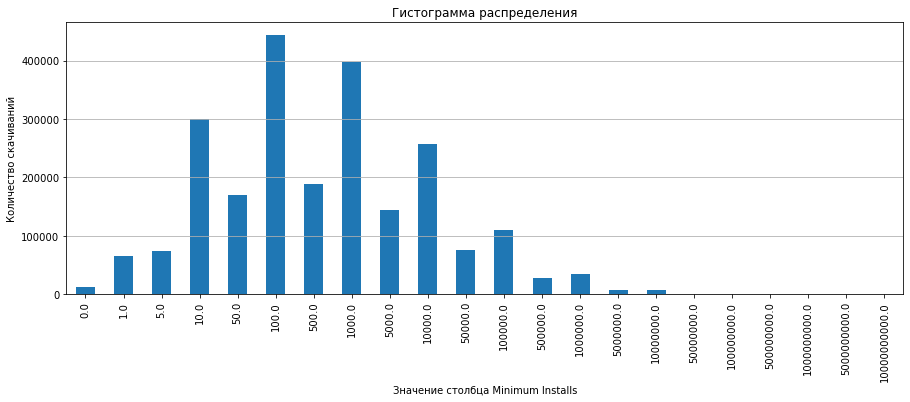

In [124]:
sorted_max_installs = dataset["Minimum Installs"].value_counts().nlargest(40).sort_index()
sorted_max_installs.plot(kind='bar', figsize=(15,5))
plt.xlabel('Значение столбца Minimum Installs')
plt.ylabel('Количество cкачиваний')
plt.title('Гистограмма распределения')
plt.grid(axis = "y")
plt.show()

### Ответ: Данные распределены неравномерно и об общей картине сложно судить, однака наибольшее количество приложений находится в интервале от 10 скачиваний, до 10 000

# 5. Приложения каких категорий скачивают чаще всего?

Сгруппирую данные с одинаковыми категориями, суммирую их значения и распределю по столбцам. Описываю так, будто это делать буду я, но за меня всю работу выполнит *Pandas*

In [133]:
category_and_downloads = dataset.groupby("Category")["Maximum Installs"].sum()

In [145]:
category_and_downloads

Category
Action                      30742136749
Adventure                    9818710287
Arcade                      25681896219
Art & Design                 1816298544
Auto & Vehicles              3056222948
Beauty                        711807155
Board                        5281549210
Books & Reference           10309375263
Business                     8577785396
Card                         3340899991
Casino                       2222890889
Casual                      30525269577
Comics                        708237879
Communication               72306404399
Dating                       1298958503
Education                   10814228456
Educational                  8276809814
Entertainment               32544902249
Events                        140492465
Finance                     11385454261
Food & Drink                 2920080309
Health & Fitness             8068396573
House & Home                  888165701
Libraries & Demo              595274491
Lifestyle                   102

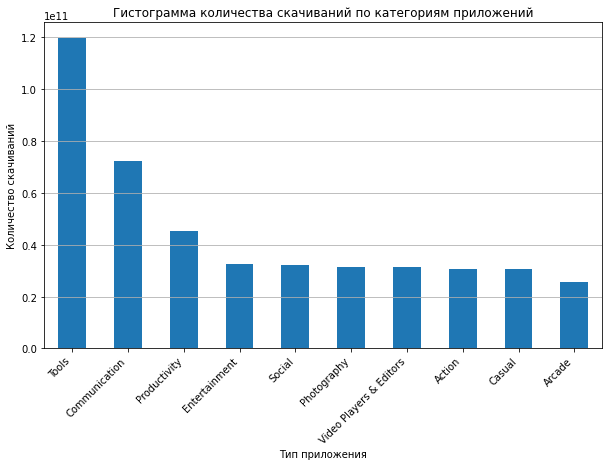

In [134]:
sorted_category_and_downloads = category_and_downloads.sort_values().nlargest(10)
sorted_category_and_downloads.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Тип приложения')
plt.ylabel('Количество скачиваний')
plt.title('Гистограмма количества скачиваний по категориям приложений')
plt.grid(axis='y')
plt.xticks(rotation=45, ha = "right")
plt.show()

### Ответ: наибольшей популярностью пользуются приложения категорий *Tools*, *Communication* и *Productivity*

# 6. Как распределены данные по рейтингу приложений?

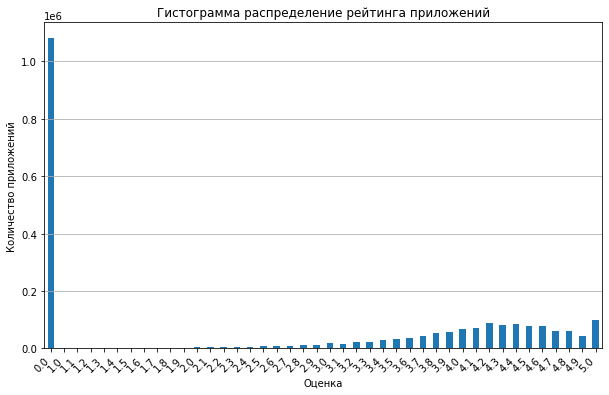

In [144]:
sorted_rating = dataset["Rating"].value_counts().sort_index()
sorted_rating.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Оценка')
plt.ylabel('Количество приложений')
plt.title('Гистограмма распределение рейтинга приложений')
plt.grid(axis='y')
plt.xticks(rotation=45, ha = "right")
plt.show()

Большая часть оценок принимает значение ноль

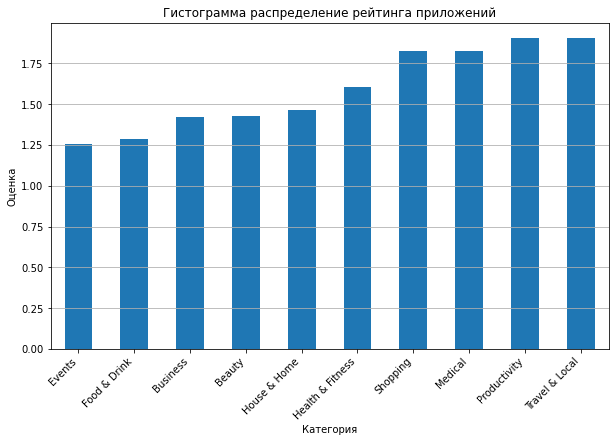

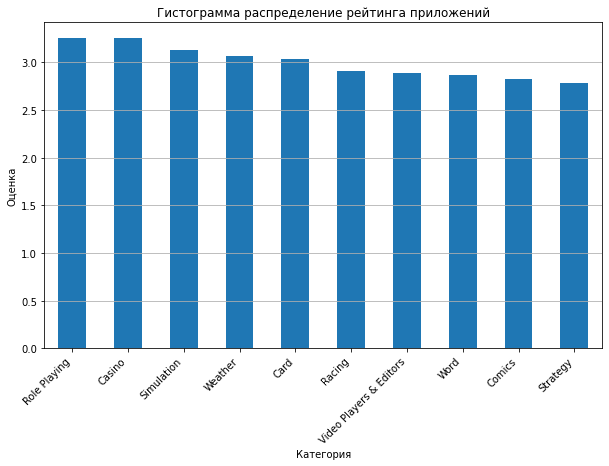

In [154]:
category_rating = dataset.groupby("Category")
rating = category_rating["Rating"].mean()
rating = rating.sort_values().nsmallest(10)
rating.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Категория')
plt.ylabel('Оценка')
plt.title('Гистограмма распределение рейтинга приложений')
plt.grid(axis='y')
plt.xticks(rotation=45, ha = "right")
plt.show()
category_rating = dataset.groupby("Category")
rating = category_rating["Rating"].mean()
rating = rating.sort_values().nlargest(10)
rating.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Категория')
plt.ylabel('Оценка')
plt.title('Гистограмма распределение рейтинга приложений')
plt.grid(axis='y')
plt.xticks(rotation=45, ha = "right")
plt.show()

**Ответ: большая часть оценок принимает значение нуля. Наибольший рейтинг принимают приложения категорий Role playing, Casino и Simulation, что может быть обьяснено лояльной аудиторией. Наименьшие оценки у приложений категорий Events, Food&Drink и Business. Предположу, что низкая оценка обусловлена репутационными и логистическими издержками, когда в неудаче конкретного блока компании винят приложение.**

# 7. Как бы вы охарактеризовали самое часто встречающееся значение в наборе данных, какое это приложение?

Вычислю самое часто встречающееся уникальное значение

In [156]:
value = dataset["App Name"].value_counts().idxmax()
value

'Tic Tac Toe'

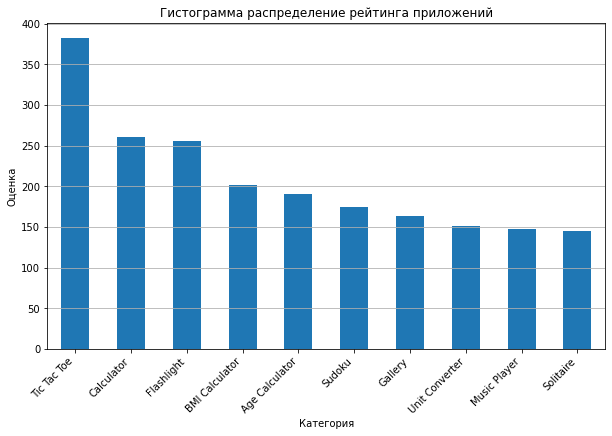

In [160]:
value = dataset["App Name"].value_counts().nlargest(10)
value.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Категория')
plt.ylabel('Оценка')
plt.title('Гистограмма распределение рейтинга приложений')
plt.grid(axis='y')
plt.xticks(rotation=45, ha = "right")
plt.show()

**Ответ: Наиболее встречающимися значениями оказались *Tic Tac Toe, Calculator, Flashlight*. Самое частое значение является простейшей в реализации гиперказуальной игрой, чем и обусловлена её популярность у разработчиков и потребителей**

# 8. Есть ли зависимость категории приложения от рейтинга приложения?

Частично ответ на этот вопрос дан в ответе на шестой в виде графика средних оценок приложений у отдельных категорий, где наибольшими оценками обладали *Role Playing*, *Casino* и *Simulation*, а наименьшими — *Events*, *Food&Drunk* и *Buisness*

Для выяснения зависимости найду корреляцию между категорией и рейтингом

Преобразую значение столбца Category в числа, соответствующие каждой категории

,Category ID,Rating
Category ID,1.000000,0.017455
Rating,0.017455,1.000000


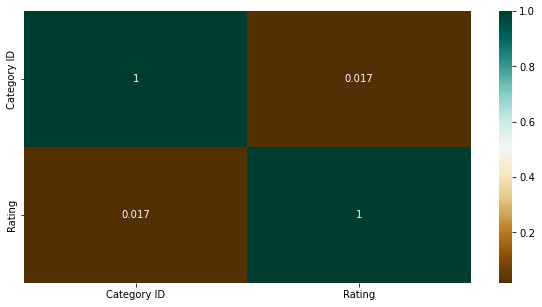

In [174]:
plt.figure(figsize=(10,5))
dataset["Category ID"] = pd.factorize(dataset['Category'])[0]
correlation = dataset[["Category ID", "Rating"]].corr()
sns.heatmap(c, cmap="BrBG", annot=True)
correlation

***Ответ : кореляция отсутствует***

# 9. Как расперделены оценки (рейтинги) приложений?

**Ответ: ответ на девятый вопрос содержится в шестом**

# 10. Как кореллируют между собой рейтинг и количество скачиваний приложения?

,Rating,Maximum Installs,Minimum Installs
Rating,1.000000,0.012671,0.011269
Maximum Installs,0.012671,1.000000,0.954037
Minimum Installs,0.011269,0.954037,1.000000


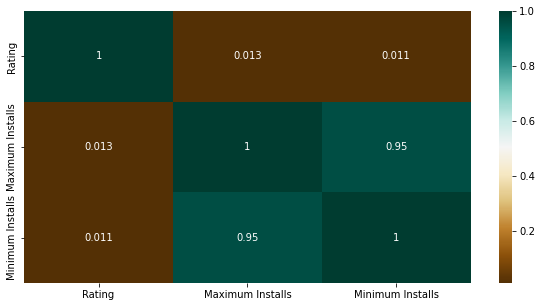

In [175]:
plt.figure(figsize=(10,5))
correlation = dataset[["Rating", "Maximum Installs", "Minimum Installs"]].corr()
sns.heatmap(correlation, cmap="BrBG", annot=True)
correlation

**Ответ: Корреляция между рейтингом и количеством установок отсутствует**